1 - Repita a análise acima para diferentes números de clusters, tal como k=2 e k=6. Varie a densidade de pontos.

In [103]:
#importa as bibliotecas básicas
from sklearn.datasets import make_blobs, make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score


In [39]:
#para 10000 pontos

c = [(-5, -5), (0, 0), (3, 4),(10,-5)]
n=100 #número de pontos
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=2, random_state=50)
X = data[0] # atributos das observacoes
labels = data[1] # classe conhecida inicialmente

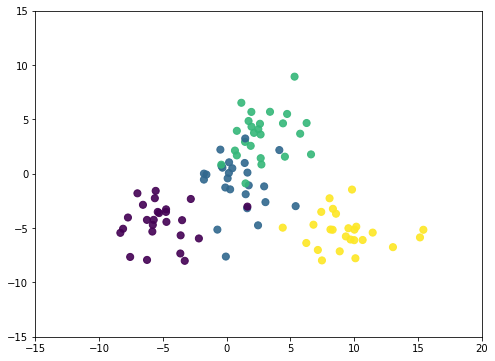

In [40]:
# mostra os dados
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.xlim(-15,20)
plt.ylim(-15,15)
plt.show(True)

K-MEANS

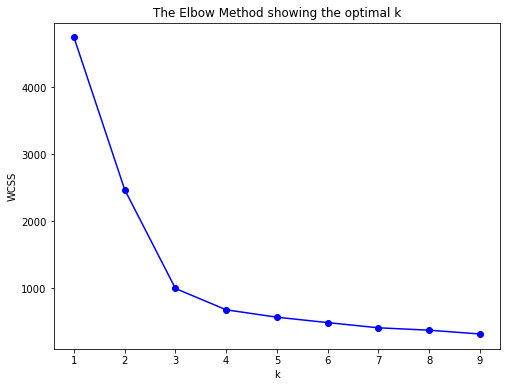

In [41]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KMEANS E AGRUPAMENTO HIERÁRQUICO

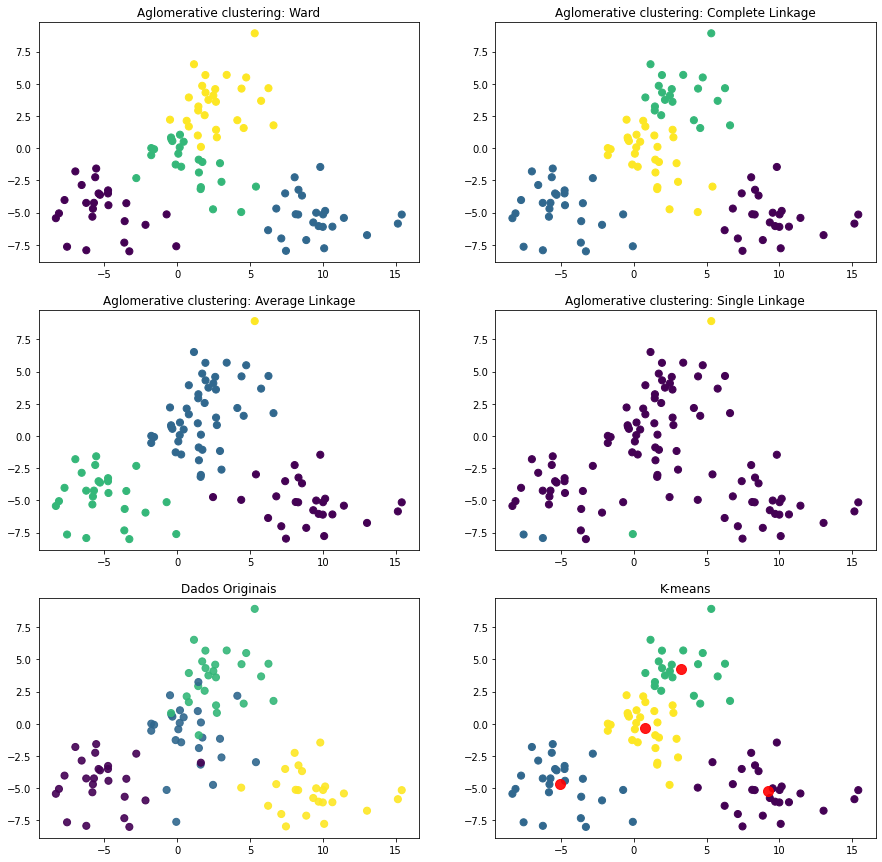

In [42]:
k=4

plt.figure(figsize=(15,15))


clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_hr_w = clustering.fit_predict(X)
plt.subplot(3,2,1)
plt.scatter(X[:,0], X[:,1], c=y_hr_w, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Ward')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='complete')
y_hr_c = clustering.fit_predict(X)
plt.subplot(3,2,2)
plt.scatter(X[:,0], X[:,1], c=y_hr_c, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Complete Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='average')
y_hr_a = clustering.fit_predict(X)
plt.subplot(3,2,3)
plt.scatter(X[:,0], X[:,1], c=y_hr_a, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Average Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr_s = clustering.fit_predict(X)
plt.subplot(3,2,4)
plt.scatter(X[:,0], X[:,1], c=y_hr_s, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')

# mostra os dados
plt.subplot(3,2,5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.title('Dados Originais')

# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# mostra o primeiro gráfico
plt.subplot(3, 2, 6)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

plt.show(True)

METRIFICANDO A PRECISÃO DOS MODELOS

In [43]:
print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Ward linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_w, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_w, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_w, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Complete linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_c, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_c, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_c, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Average linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_a, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_a, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_a, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_s, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_s, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_s, metric='euclidean'))

K-means:
Adjusted rand score: 0.7242095469121239
Mutual information score: 1.0241316872346928
Silhouette score: 0.5141076424049739


Agrupamento hierárquico - Ward linkage:
Adjusted rand score: 0.7195063124802475
Mutual information score: 1.0120494545940997
Silhouette score: 0.4753318643917894


Agrupamento hierárquico - Complete linkage:
Adjusted rand score: 0.7170130537909072
Mutual information score: 1.0200812512394402
Silhouette score: 0.5062735435232858


Agrupamento hierárquico - Average linkage:
Adjusted rand score: 0.6238152780002039
Mutual information score: 0.8853986589565337
Silhouette score: 0.4895975480639238


Agrupamento hierárquico - Single linkage:
Adjusted rand score: 0.00017074024432928964
Mutual information score: 0.05586856175853648
Silhouette score: -0.14188633616638685


2 - Repita a análise para dados gerados usando a função make_circles (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). Varie o número de observações e veja como se comporta o agrupamento.

In [78]:
c = [(-5, -5), (0, 0), (3, 4),(10,-5)]
n=500 #número de pontos
data = make_circles(n_samples=n, shuffle=True, noise=False, random_state=50, factor = 0.2)
X = data[0] # atributos das observacoes
labels = data[1] # classe conhecida inicialmente

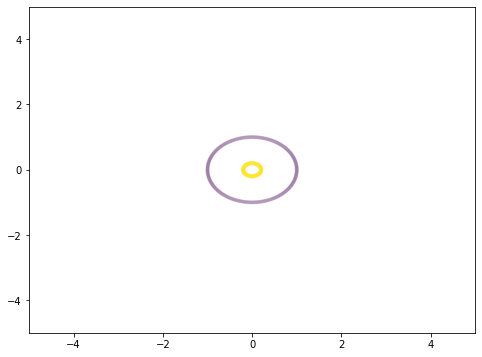

In [84]:
# mostra os dados
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=10, alpha=0.1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show(True)

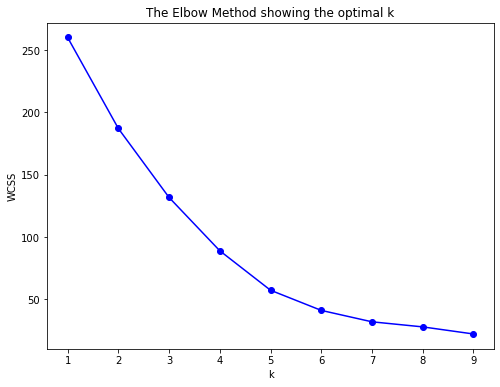

In [89]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

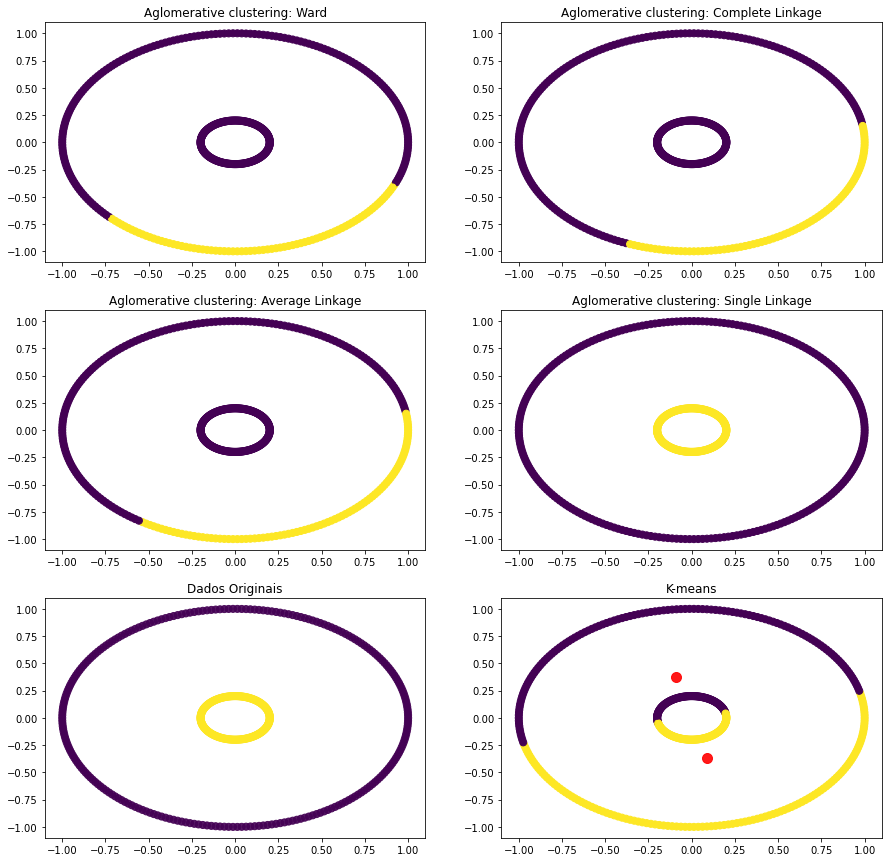

In [91]:
k=2

plt.figure(figsize=(15,15))


clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
y_hr_w = clustering.fit_predict(X)
plt.subplot(3,2,1)
plt.scatter(X[:,0], X[:,1], c=y_hr_w, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Ward')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='complete')
y_hr_c = clustering.fit_predict(X)
plt.subplot(3,2,2)
plt.scatter(X[:,0], X[:,1], c=y_hr_c, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Complete Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='average')
y_hr_a = clustering.fit_predict(X)
plt.subplot(3,2,3)
plt.scatter(X[:,0], X[:,1], c=y_hr_a, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Average Linkage')

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr_s = clustering.fit_predict(X)
plt.subplot(3,2,4)
plt.scatter(X[:,0], X[:,1], c=y_hr_s, cmap='viridis', s=50)
plt.title('Aglomerative clustering: Single Linkage')

# mostra os dados
plt.subplot(3,2,5)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.title('Dados Originais')

# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# mostra o primeiro gráfico
plt.subplot(3, 2, 6)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

plt.show(True)

In [92]:
print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Ward linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_w, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_w, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_w, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Complete linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_c, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_c, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_c, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Average linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_a, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_a, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_a, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - Single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr_s, data[1]))
print('Mutual information score:', mutual_info_score(y_hr_s, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr_s, metric='euclidean'))

K-means:
Adjusted rand score: -0.002008032128514056
Mutual information score: 8.881784197001252e-16
Silhouette score: 0.25429524462538766


Agrupamento hierárquico - Ward linkage:
Adjusted rand score: 0.09889504289319712
Mutual information score: 0.12442972985441325
Silhouette score: 0.3901167905144133


Agrupamento hierárquico - Complete linkage:
Adjusted rand score: 0.11190093037630684
Mutual information score: 0.13352744868806987
Silhouette score: 0.39458017170121346


Agrupamento hierárquico - Average linkage:
Adjusted rand score: 0.1343821777771557
Mutual information score: 0.1484636556137935
Silhouette score: 0.39976057328416037


Agrupamento hierárquico - Single linkage:
Adjusted rand score: 1.0
Mutual information score: 0.6931471805599454
Silhouette score: 0.26848987505032085


# PROVA - EXERCICIO 4

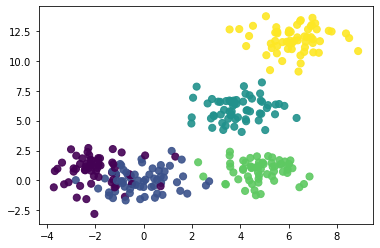

In [127]:
np.random.seed(201)

# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]
n=300
data = make_blobs(n_samples=n,n_features=2, centers=c, cluster_std=1, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

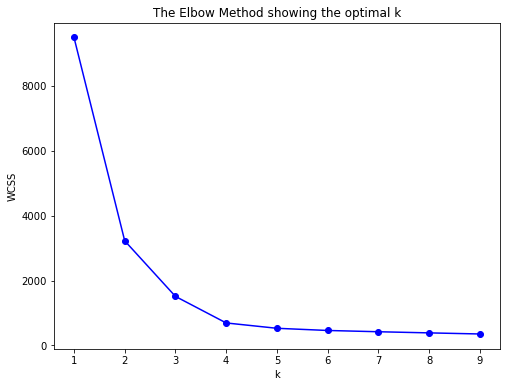

In [128]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

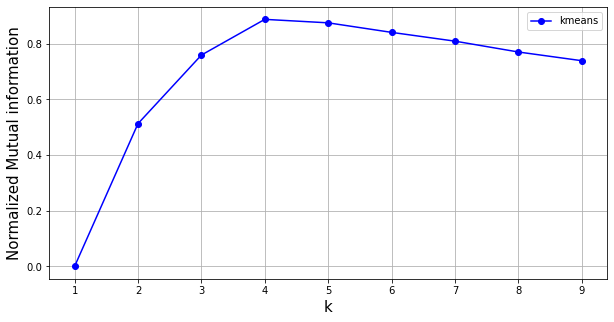

In [129]:
from scipy.spatial.distance import cdist

NMI_km = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, labels, average_method='arithmetic'))

plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

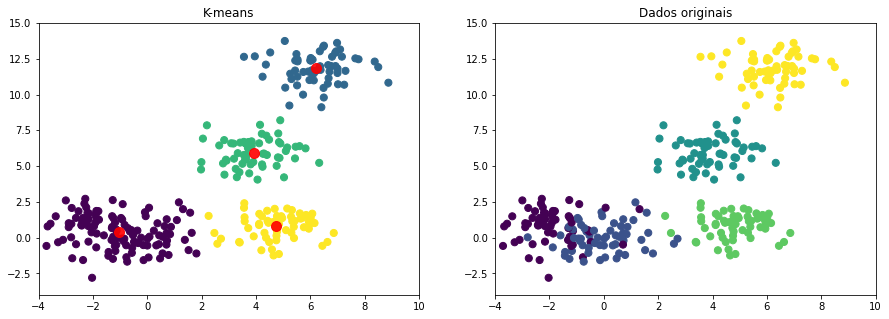

In [130]:

k = 4 # numero de clusters a serem identificados

# define o método com k clusters
kmeans = KMeans(n_clusters=k) 

# realiza o ajuste considerando os dados X
kmeans.fit(X)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)

# define o tamanha da figura
plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-4,10)
plt.ylim(-4,15)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-4,10)
plt.ylim(-4,15)
plt.title('Dados originais')
plt.show(True)

# PROVA - EXERCICIO 5

In [139]:
from sklearn import datasets

np.random.seed(101)

iris = datasets.load_iris()
X= iris.data
y= iris.target

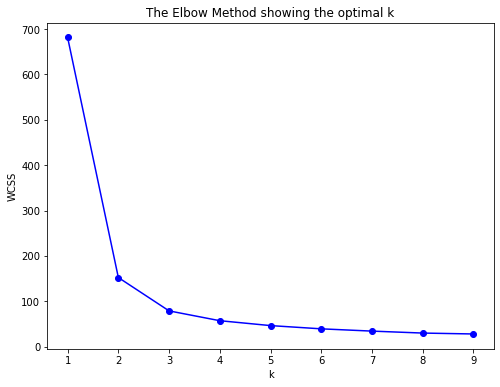

In [140]:
WCSS= []
K = range(1,10)
# considerando diversos valores de k
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    # calcula a medida e armazena em uma lista 
    WCSS.append(kmeans.inertia_)

# mostra os resultados
plt.figure(figsize=(8,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

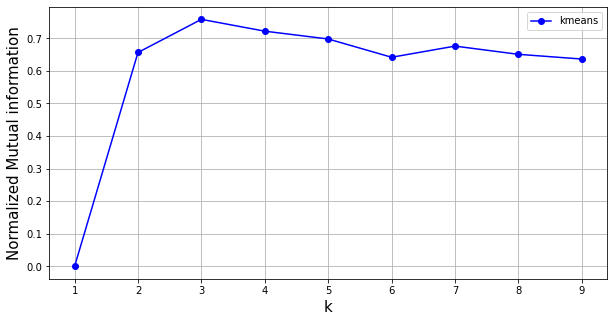

In [141]:

NMI_km = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, y, average_method='arithmetic'))

plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()